In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import scipy.constants as const

In [60]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

In [61]:
h = const.h
c = const.c
e = const.e

In [62]:
root = 'sample_01'
paths = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files]

In [63]:
def get_filter(path):
    path = re.findall(r'\d+', path.split('_')[-1])[0]
    return path[0] + '.' + path[1]

In [64]:
class Dataset:
    def __init__(self, filename, filt, temperature, wavelengths, intensities, integration_time):
        self.filename = filename
        self.filter = filt
        self.temperature = temperature
        self.wavelengths = wavelengths
        self.intensities = intensities
        self.integration_time = integration_time

In [65]:
sets = []
integration_time = 0.05  # seconds

for file in paths:
    df = pd.read_csv(file)
    df.columns = ['wavelength', 'intensity', 'temperature']
    wavelengths = df['wavelength'].to_numpy() * 1E-9
    intensities = df['intensity'].to_numpy() / integration_time
    
    T = df['temperature'][0]
    filename = os.path.basename(file)
    filt = float(get_filter(file))
    
    d = Dataset(filename, filt, T, wavelengths, intensities, integration_time)
    
    sets.append(d)

Text(0.5, 0.98, 'Sample YW1127')

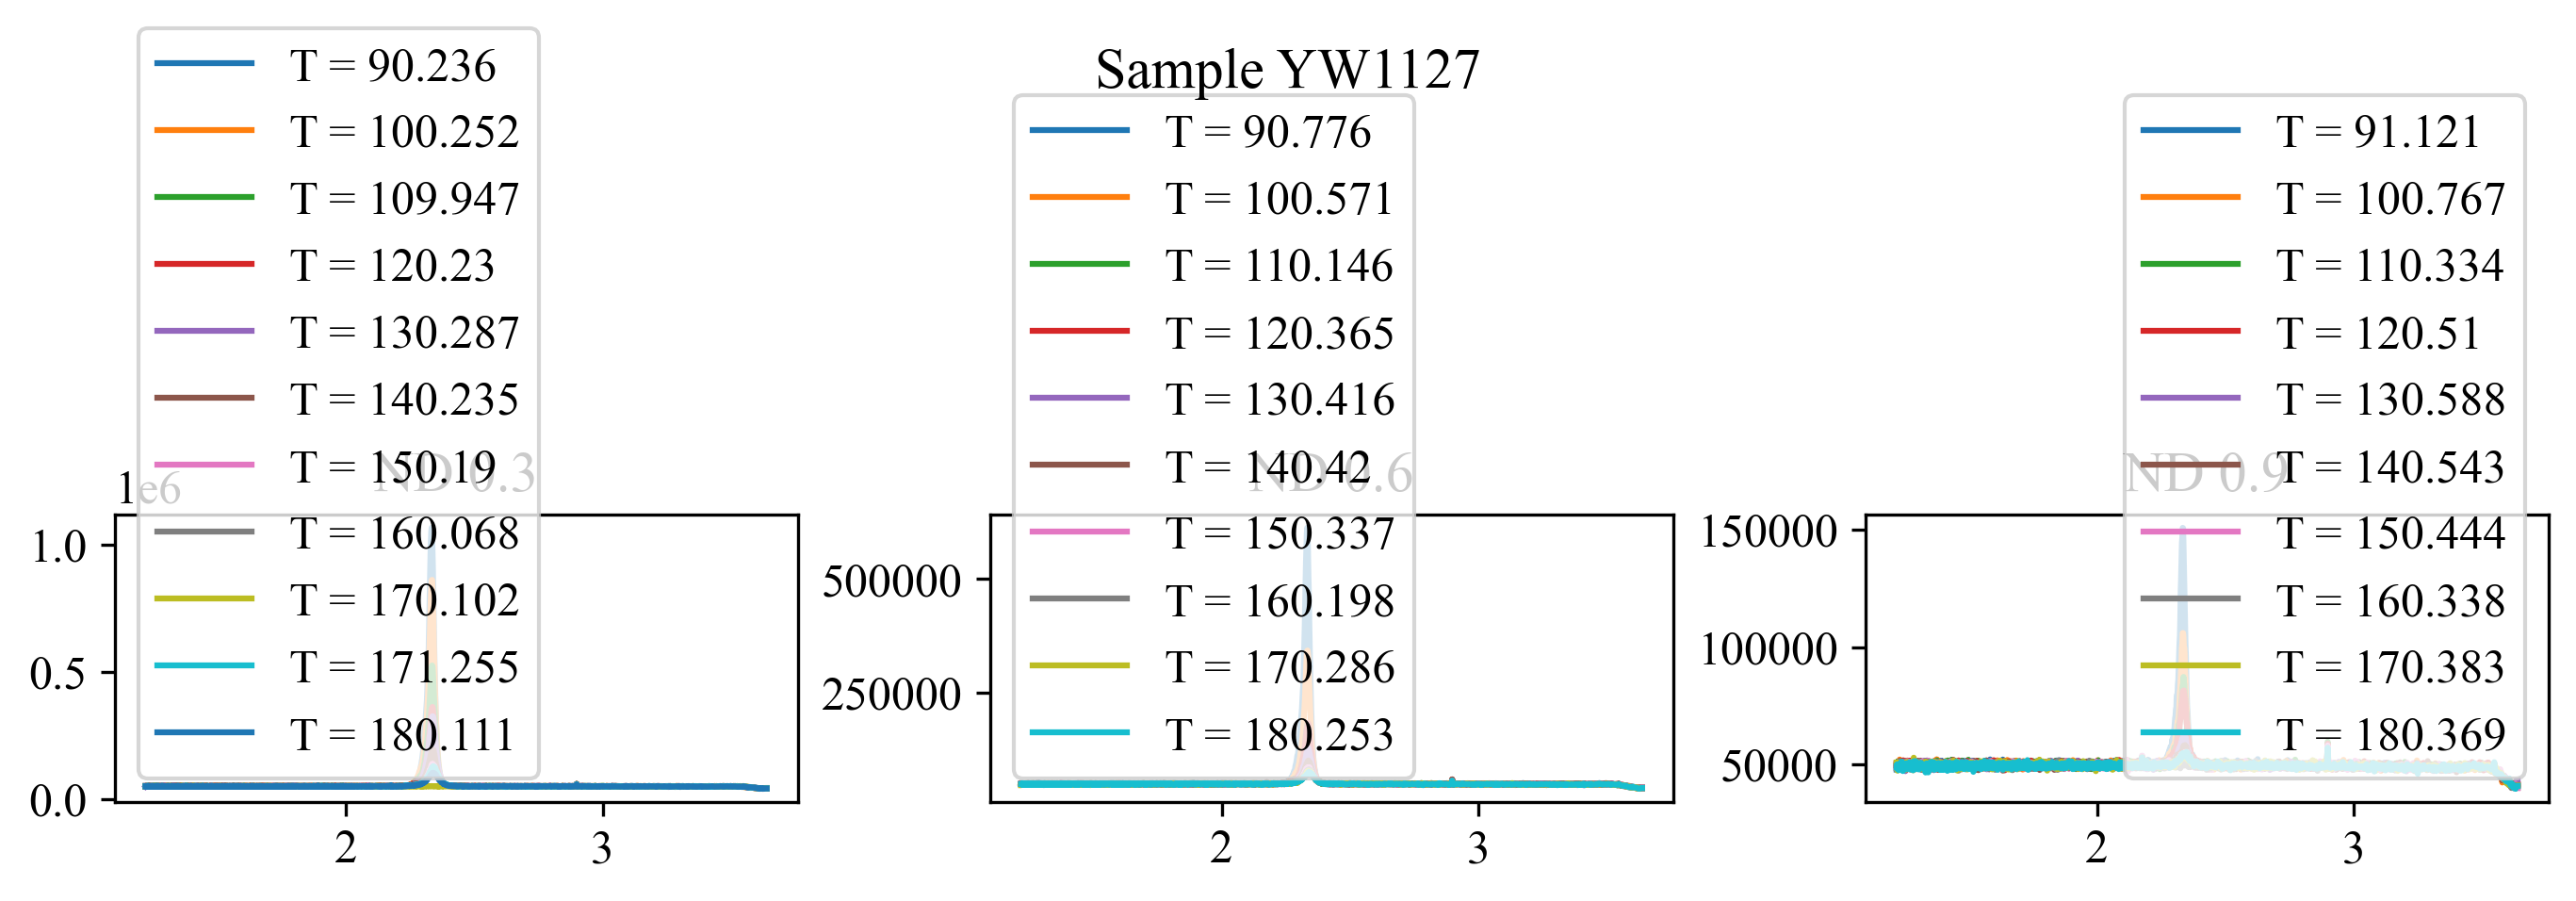

In [66]:
sets = sorted(sets, key=lambda x: x.temperature)

fig, ax = plt.subplots(1, 3, figsize=(9, 3), constrained_layout=True)

for i, nd in enumerate([0.3, 0.6, 0.9]):
    for d in sets:
        if d.filter == nd:
            ax[i].plot(h * c / d.wavelengths / e, d.intensities, label=f'T = {d.temperature}')
            # ax[i].set_xlim(2, 2.5)
            # ax[i].set_ylim(0, 60000)
    ax[i].set_title(f'ND {nd}')
    ax[i].legend()
    
fig.suptitle('Sample YW1127')

In [67]:
root = 'sample_02'
paths = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files]

In [68]:
sets = []
def get_filter2(path):
    nd = re.findall(r'\d+', path.split('_')[-3])[0]
    return int(nd) / 10

def get_integration_time(path):
    inttime = re.findall(r'\d+', path.split('_')[-2])[0]
    return int(inttime) / 100

for file in paths:
    filename = os.path.basename(file)
    filt = float(get_filter2(file))
    integration_time = get_integration_time(file)
    
    df = pd.read_csv(file)    
    df.columns = ['wavelength', 'intensity', 'temperature']
    wavelengths = df['wavelength'].to_numpy()
    intensities = df['intensity'].to_numpy() / integration_time
    
    T = df['temperature'][0]
    
    d = Dataset(filename, filt, T, wavelengths, intensities, integration_time)
    sets.append(d)
    
sets = sorted(sets, key=lambda x: x.temperature)
sets = sorted(sets, key=lambda x: x.filter)

Text(0.5, 0.98, 'Sample YW1149')

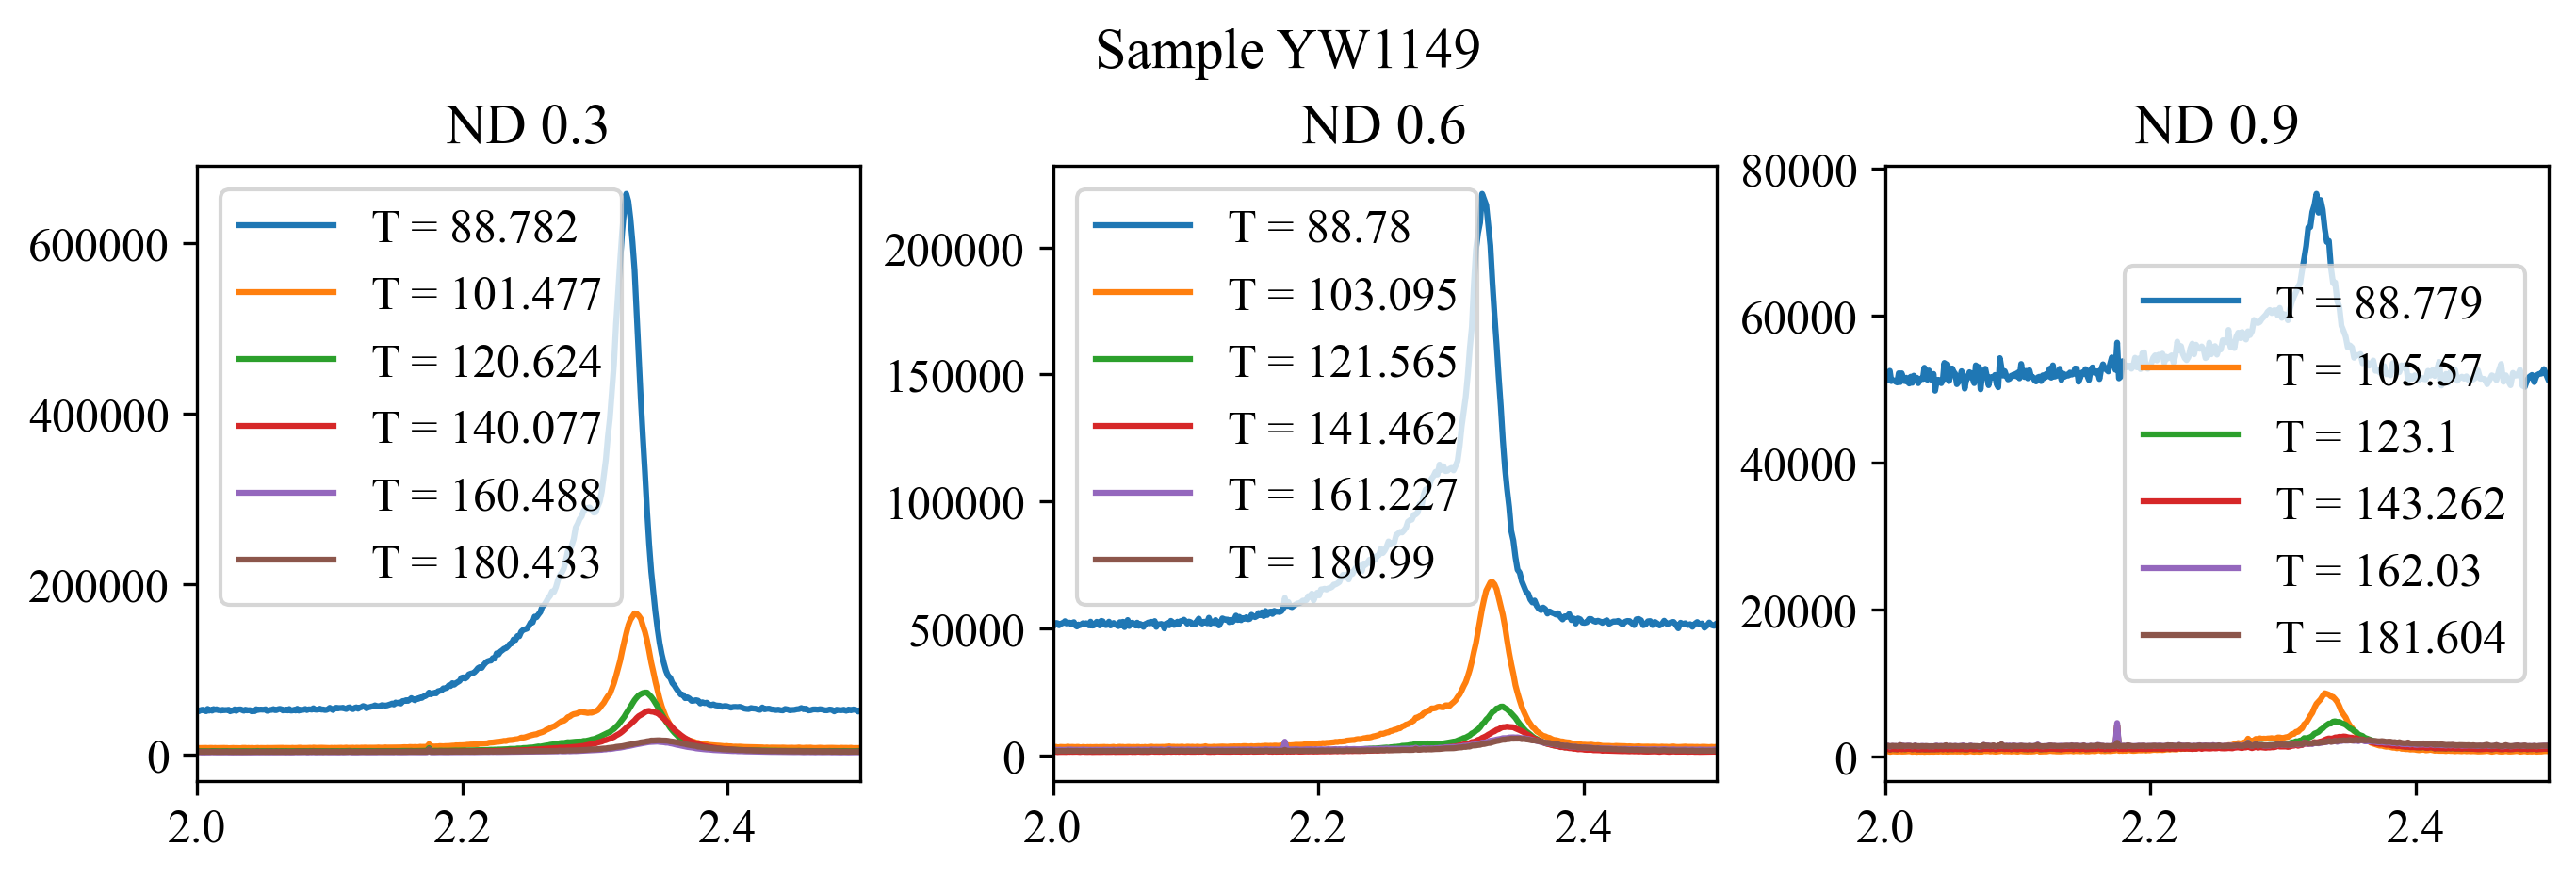

In [69]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3), constrained_layout=True)

for i, nd in enumerate([0.3, 0.6, 0.9]):
    for d in sets:
        if d.filter == nd:
            ax[i].plot(h * c / (d.wavelengths * 1E-9) / e, d.intensities, label=f'T = {d.temperature}')
            ax[i].set_xlim(2, 2.5)
            # ax[i].set_ylim(0, 60000)
    ax[i].set_title(f'ND {nd}')
    ax[i].legend()
    
fig.suptitle('Sample YW1149')

Note that the readings don't share a zero level. Edit the wavelength readings to try to fix this.

Text(0, 0.5, 'PL Intensity [counts / s]')

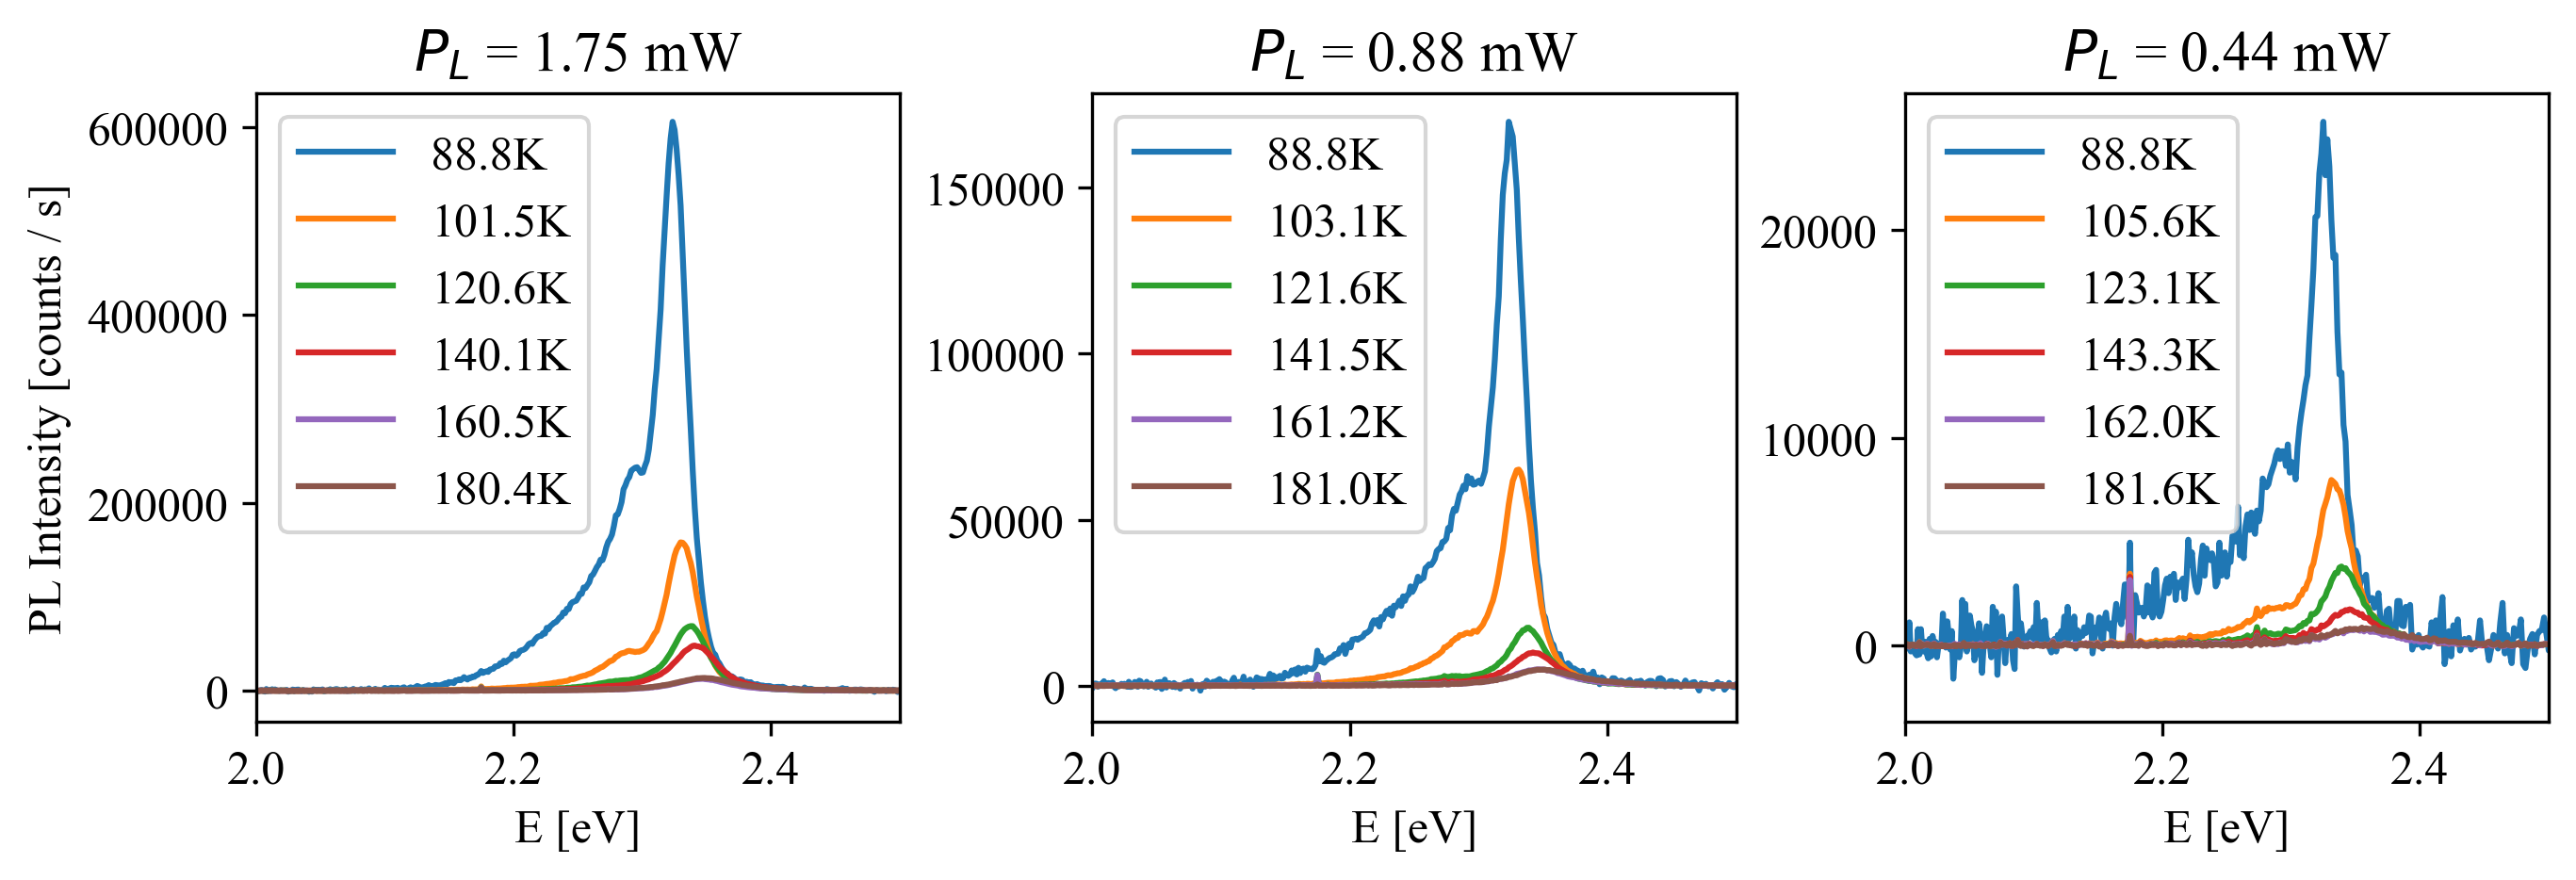

In [70]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3), constrained_layout=True)

for i, nd in enumerate([0.3, 0.6, 0.9]):
    for d in sets:
        if d.filter == nd:
            avg = np.mean(d.intensities[-400:])
            power = 3.49E-3 * 10 ** -nd
            ax[i].plot((h * c / (d.wavelengths * 1E-9) / e)[100:], d.intensities[100:] - avg, label=f'{d.temperature:.1f}K')
            ax[i].set_xlim(2, 2.5)
            ax[i].set_xlabel("E [eV]")
            # ax[i].set_ylim(0, 60000)
    ax[i].set_title(f'$P_L$ = {power / 10 ** -3 :.2f} mW')
    ax[i].legend()

ax[0].set_ylabel("PL Intensity [counts / s]")
# fig.suptitle('Sample YW1149')

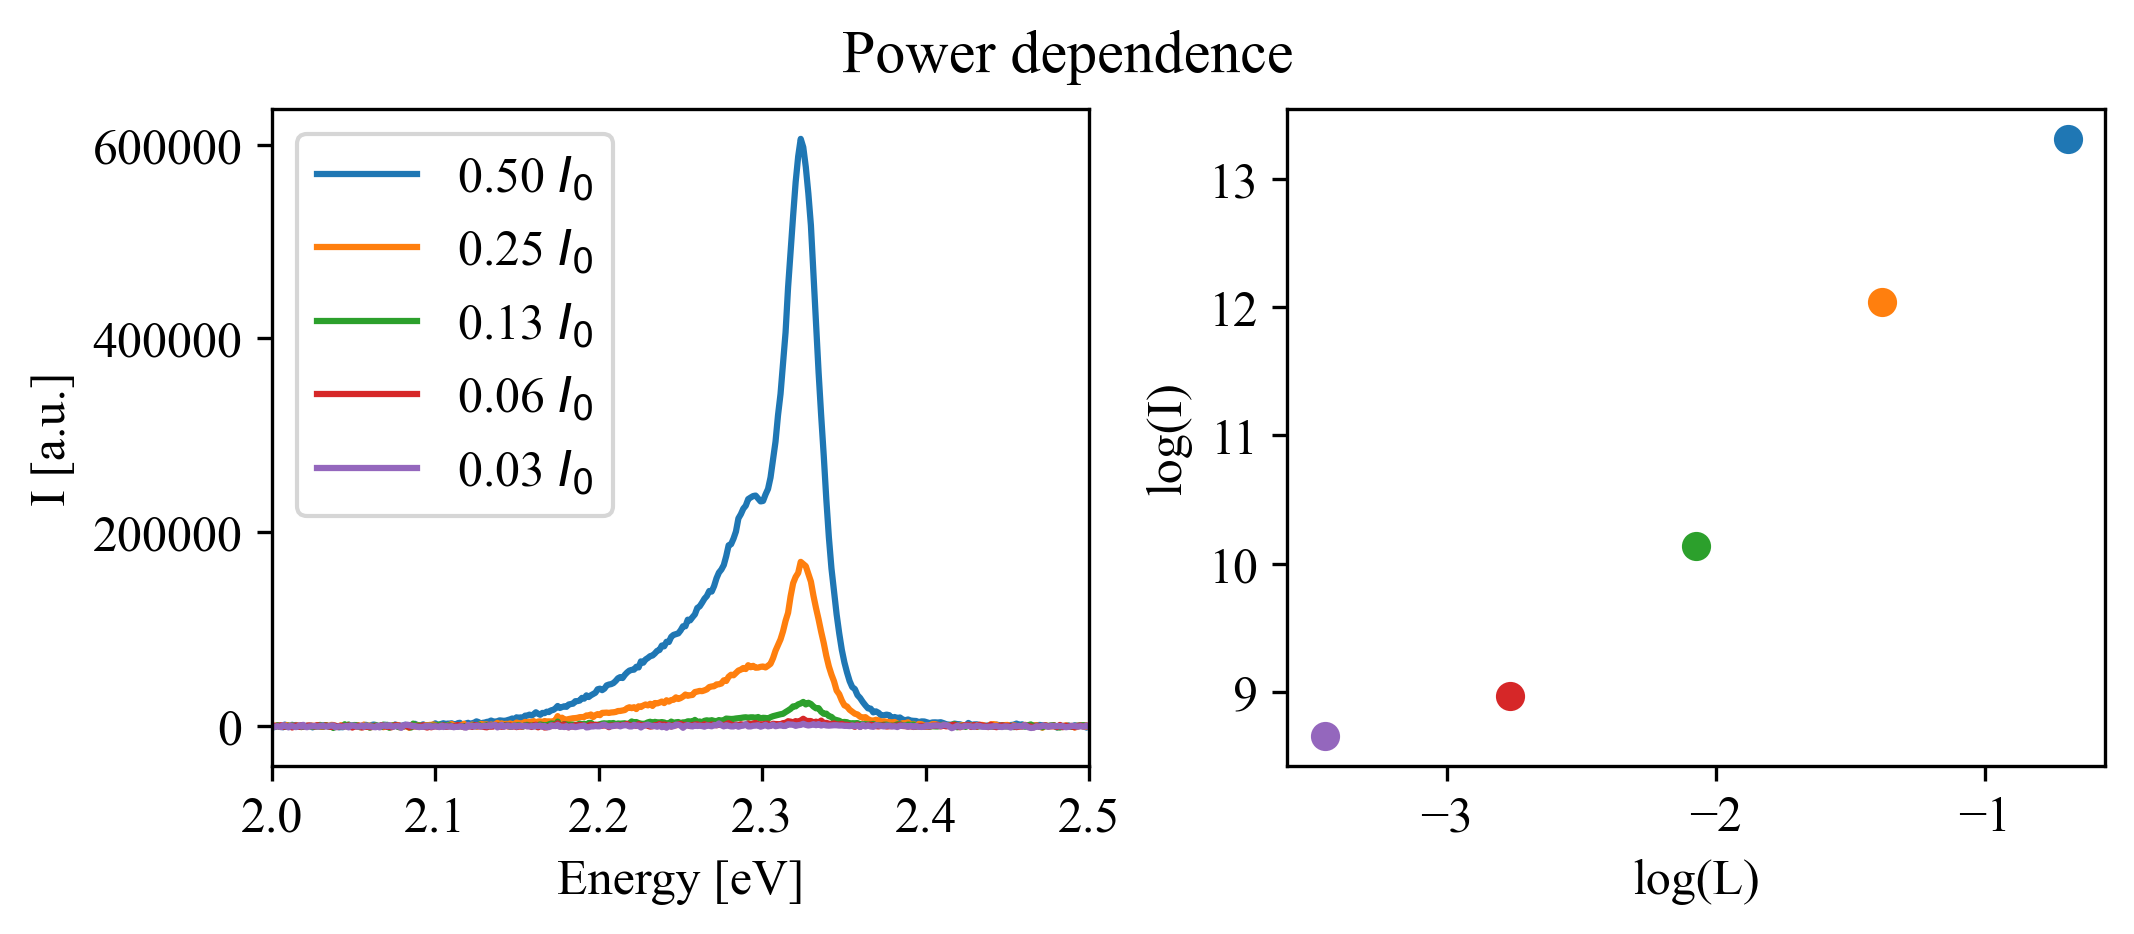

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3), constrained_layout=True)

for d in sets:
    if float(d.temperature) <= 90:
        intensities = d.intensities - np.mean(d.intensities[-400:])
        x = float(d.filter)
        
        # Plot intensity profiles
        ax[0].plot((h * c / (d.wavelengths * 1E-9) / e), intensities, label = f'{10 ** -d.filter :.2f} $I_0$')
        ax[0].set_xlim(2, 2.5)
        
        # Plot power dependence
        ax[1].scatter(np.log(10 ** -x), np.log(np.amax(intensities)))

ax[0].legend()
ax[0].set_xlabel("Energy [eV]")
ax[0].set_ylabel("I [a.u.]")

ax[1].set_xlabel("log(L)")
ax[1].set_ylabel("log(I)")

fig.suptitle(f'Power dependence')  
plt.show()

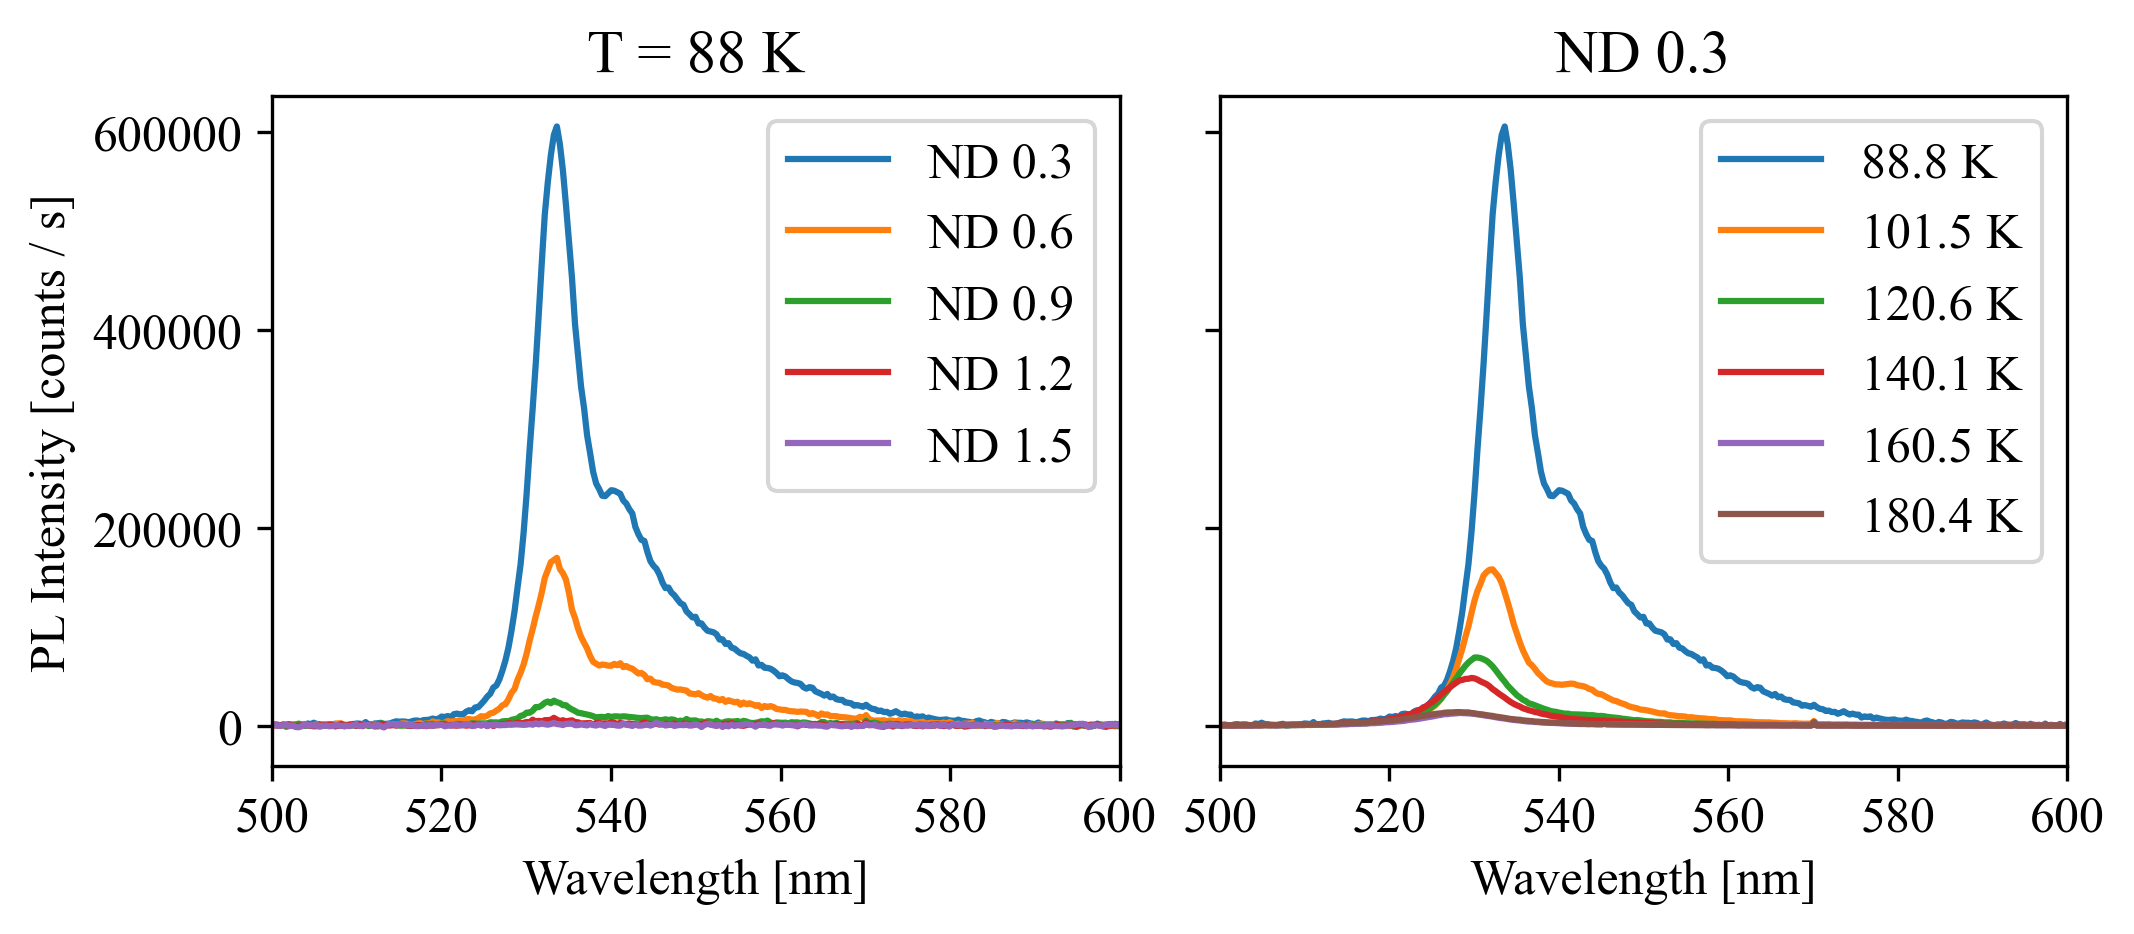

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3), sharey=True, constrained_layout=True)

for d in sets:
    if float(d.temperature) <= 90:
        intensities = d.intensities - np.mean(d.intensities[-400:])
        ax[0].plot(d.wavelengths, intensities, label = f'ND {d.filter}')
        ax[0].set_xlim(500, 600)
        
ax[0].legend(loc='upper right')
ax[0].set_title('T = 88 K')
ax[0].set_xlabel("Wavelength [nm]")
ax[0].set_ylabel("PL Intensity [counts / s]")

for d in sets:
    if d.filter == 0.3:
        intensities = d.intensities - np.mean(d.intensities[-400:])
        ax[1].plot(d.wavelengths[200:], intensities[200:], label = f'{d.temperature:.1f} K')
        ax[1].set_xlim(500, 600)

ax[1].legend()
ax[1].set_title('ND 0.3')
ax[1].set_xlabel("Wavelength [nm]")

# fig.suptitle(f'Power dependence')  
plt.show()

Text(0, 0.5, 'PL Intensity [counts / s]')

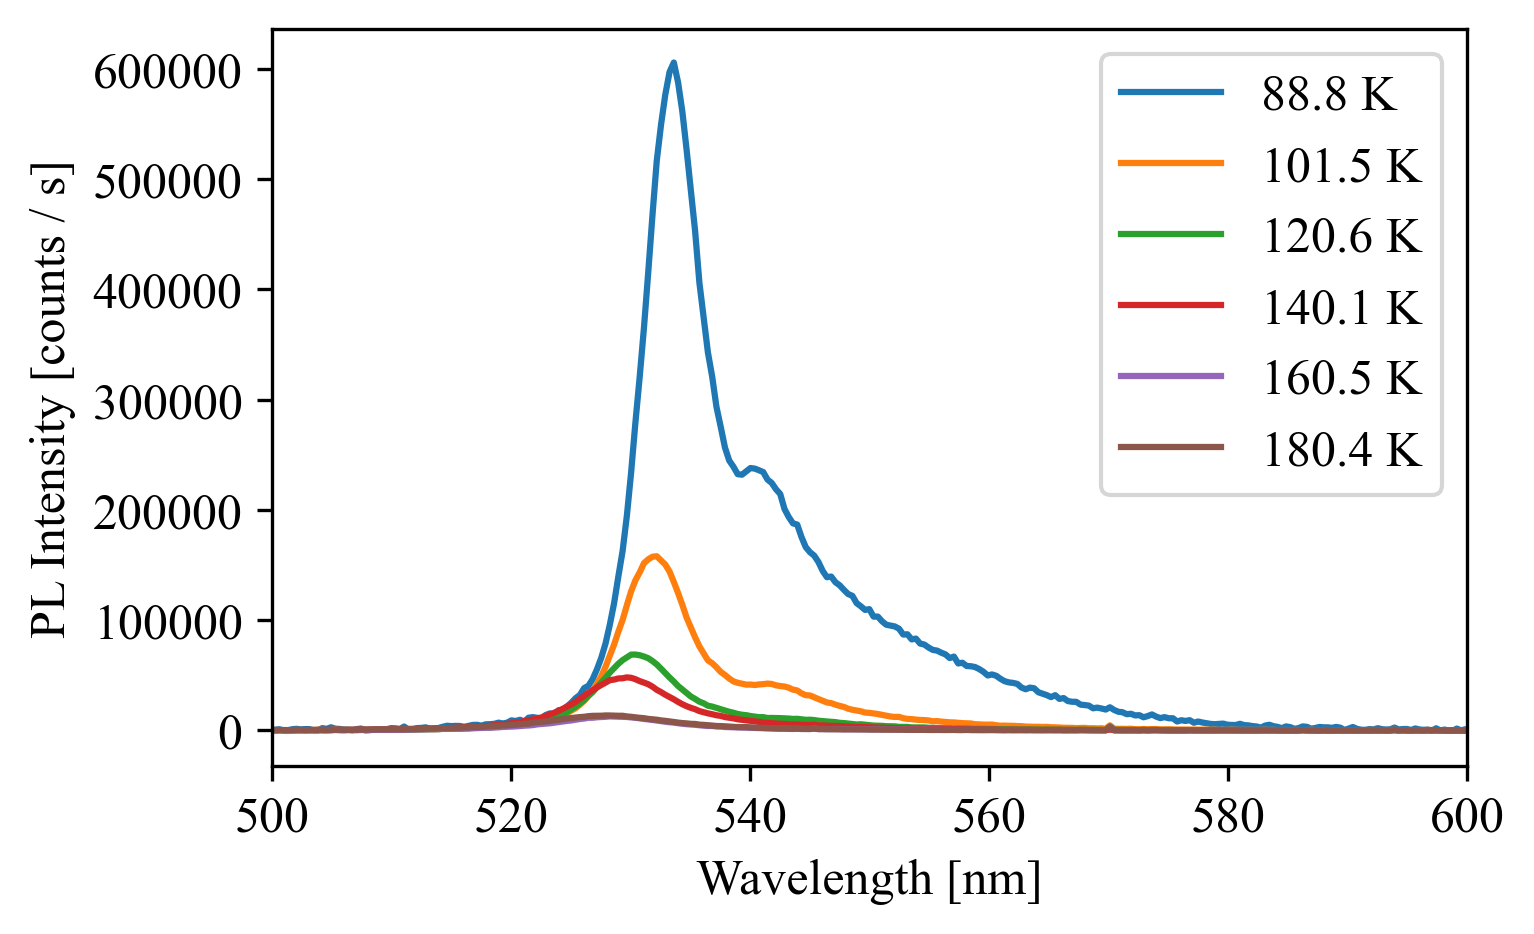

In [98]:
fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)

for d in sets:
    if d.filter == 0.3:
        intensities = d.intensities - np.mean(d.intensities[-400:])
        
        # ax.plot((h * c / (d.wavelengths * 1E-9) / e)[100:], d.intensities[100:] - avg, label=f'{d.temperature:.1f}K')            

        ax.plot(d.wavelengths[200:], intensities[200:], label = f'{d.temperature:.1f} K')
        ax.set_xlim(500, 600)

ax.legend()
ax.set_xlabel("Wavelength [nm]")

ax.set_ylabel("PL Intensity [counts / s]")
# fig.suptitle('Sample YW1149')